In [339]:
import datetime
#numpyのインストール
import numpy as np
#pandasのインストール
import pandas as pd
#statistics
import statistics as st
#statsmodelsのインストール
import statsmodels.api as sm
#時系列モデルのインストール
from statsmodels.tsa import stattools as st
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from statsmodels.tsa.arima_model import ARIMA
#scikit-learnのインストール
import sklearn.linear_model as lm
#msnoのインストール
import missingno as msno
#pyplotのインストール
import matplotlib.pyplot as plt
#seabornのインストール
import seaborn as sns
%matplotlib inline
sns.set()
lr = lm.LogisticRegression()

In [386]:
w_data = pd.read_csv('data4.csv', index_col='year', parse_dates=True)

In [387]:
w_data = w_data.loc[:'2016-01-01']

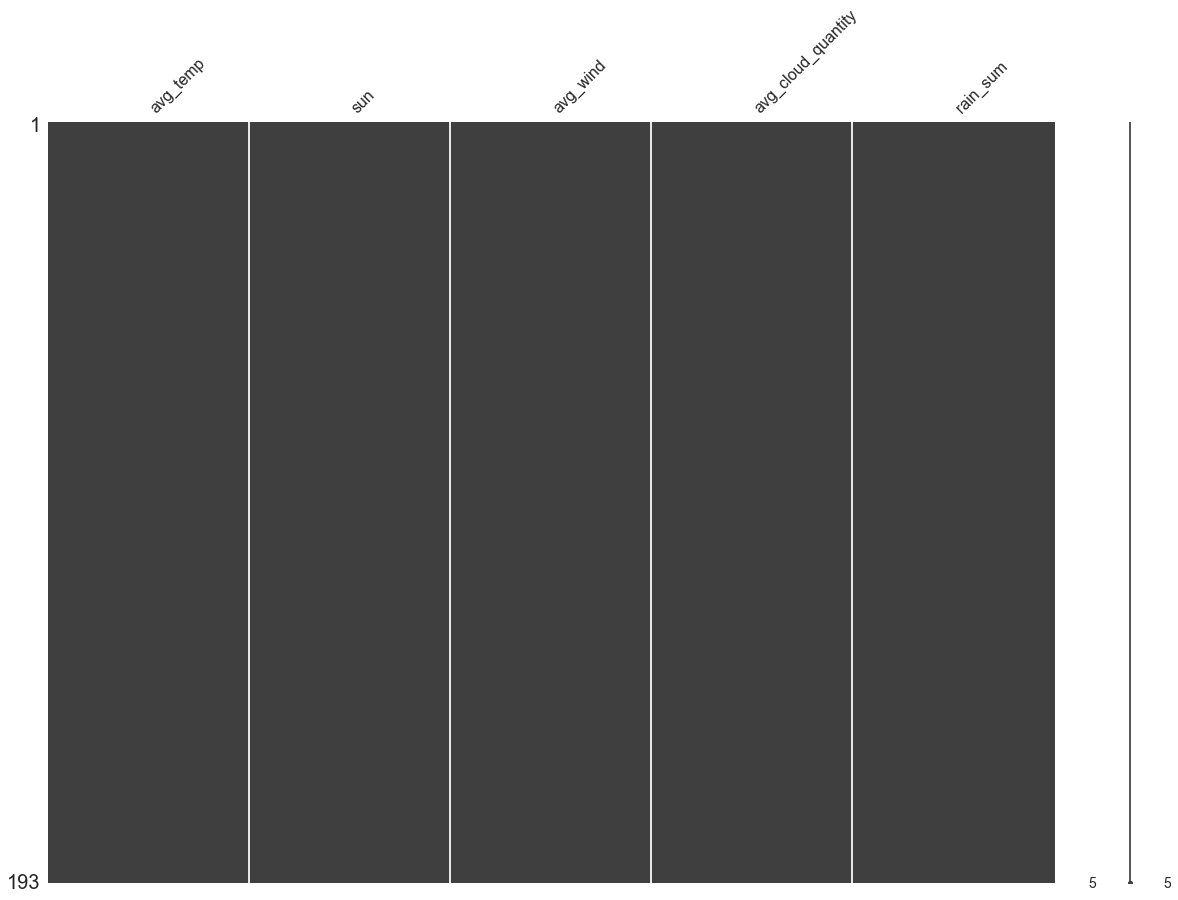

In [388]:
#データ欠損の確認 (欠損なし！)
msno.matrix(df=w_data,figsize=(20,14))

In [389]:
#原系列に対するADF検定
print (st.adfuller(w_data['avg_temp'].values.ravel()))
print (st.adfuller(w_data['sun'].values.ravel()))
print (st.adfuller(w_data['avg_wind'].values.ravel()))
print (st.adfuller(w_data['rain_sum'].values.ravel()))
print (st.adfuller(w_data['avg_cloud_quantity'].values.ravel()))

(-3.248379233769934, 0.017349619873963332, 13, 179, {'1%': -3.4674201432469816, '5%': -2.8778260518445382, '10%': -2.5754520823320122}, 563.00708532917849)
(-5.6452522952049531, 1.0148339810784462e-06, 5, 187, {'1%': -3.465811691080702, '5%': -2.8771233514726489, '10%': -2.5750770662586864}, 1810.4614354576156)
(-1.9273783306534453, 0.31929309508873527, 13, 179, {'1%': -3.4674201432469816, '5%': -2.8778260518445382, '10%': -2.5754520823320122}, 135.62639424174807)
(-8.0428540579589622, 1.8272691882739725e-12, 9, 183, {'1%': -3.4665980802684251, '5%': -2.8774669520682674, '10%': -2.5752604356654425}, 2130.8636047870687)
(-2.8874439427705139, 0.046827699898486813, 12, 180, {'1%': -3.4672111510631001, '5%': -2.8777347668038411, '10%': -2.5754033641975309}, 500.05773877276579)


# Since P-value is not less than 0.01 , these vars are 単位根

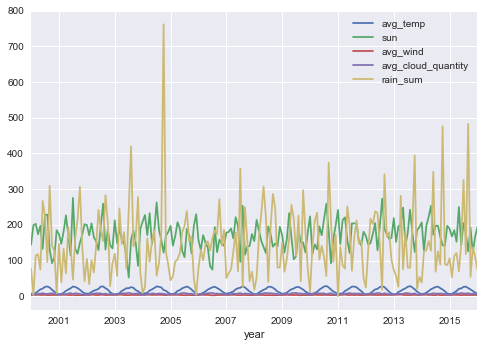

In [390]:
#原系列のplot
w_data.plot()

In [391]:
##各移動平均と差分系列を取得
#気温
temp_data = w_data.loc[:,['avg_temp']]
temp_moving_avg = temp_data.rolling(window=12).mean().dropna()
temp_diff = temp_data.diff().dropna()
#日差し
sun_data = w_data.loc[:,['sun']]
sun_moving_avg = sun_data.rolling(window=12).mean().dropna()
sun_diff = sun_data.diff().dropna()
#風量
wind_data = w_data.loc[:,['avg_wind']]
wind_moving_avg = wind_data.rolling(window=12).mean().dropna()
wind_diff = wind_data.diff().dropna()
#雨量
rain_data = w_data.loc[:,['rain_sum']]
rain_moving_avg = rain_data.rolling(window=12).mean().dropna()
rain_diff = rain_data.diff().dropna()
#雲量
cloud_data = w_data.loc[:,['avg_cloud_quantity']]
cloud_moving_avg = cloud_data.rolling(window=12).mean().dropna()
cloud_diff = cloud_data.diff().dropna()

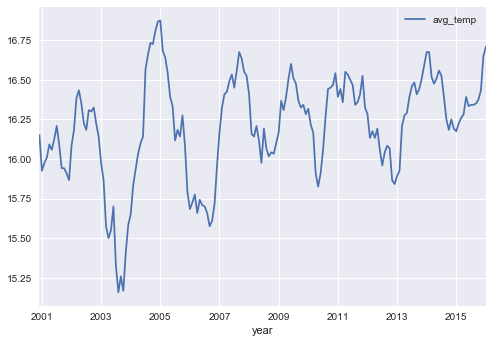

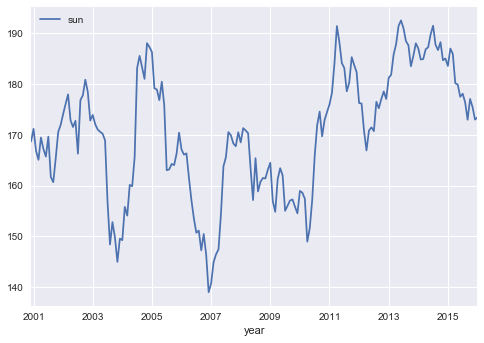

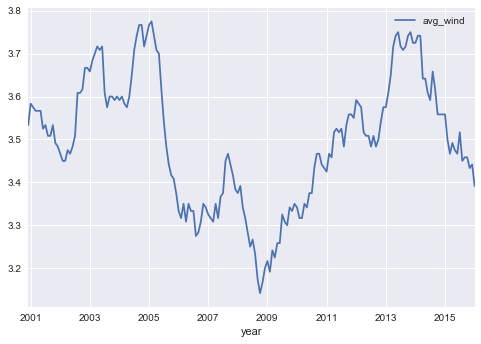

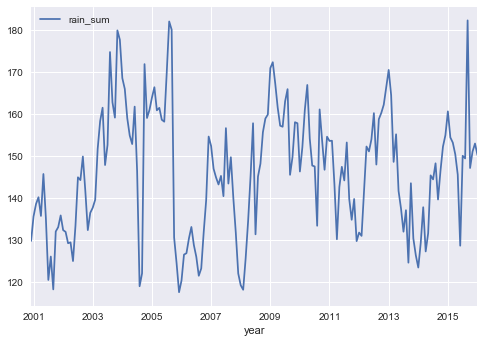

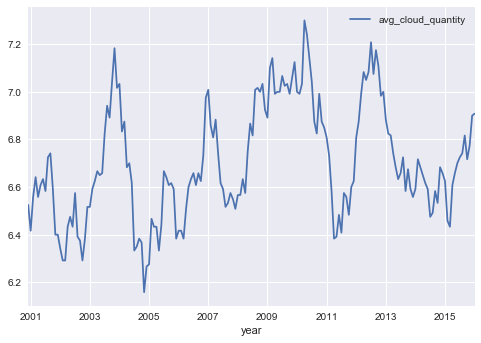

In [392]:
temp_moving_avg.plot()
sun_moving_avg.plot()
wind_moving_avg.plot()
rain_moving_avg.plot()
cloud_moving_avg.plot()

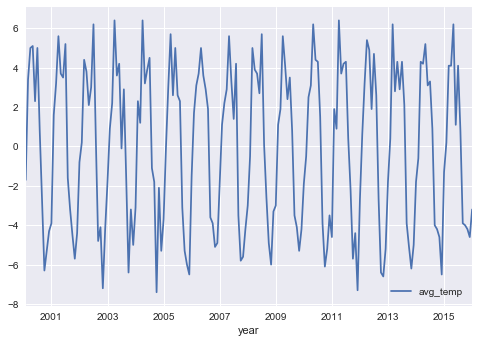

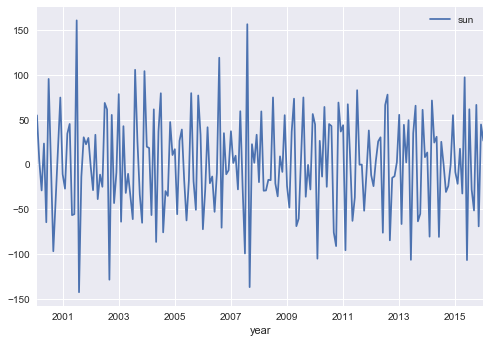

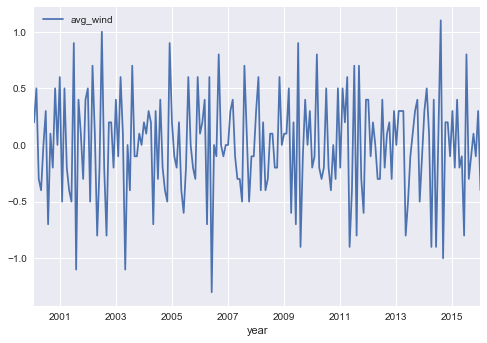

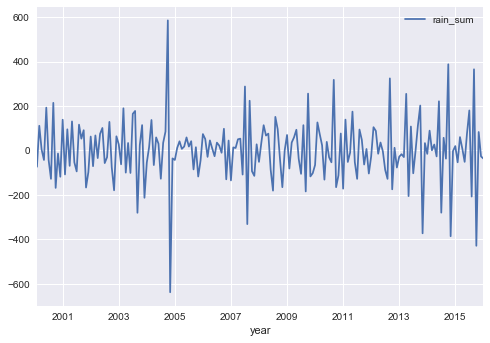

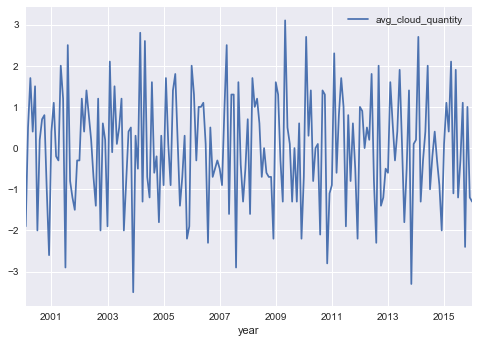

In [393]:
#差分系列のplot
temp_diff.plot()
sun_diff.plot()
wind_diff.plot()
rain_diff.plot()
cloud_diff.plot()

## 差分系列が定常過程なので、単位根過程として捉える

In [394]:
diff_data = pd.concat([temp_diff,sun_diff,wind_diff,rain_diff,cloud_diff],axis=1)

In [395]:
#差分系列をADF検定
print (st.adfuller(temp_diff['avg_temp'].values.ravel()))
print (st.adfuller(sun_diff['sun'].values.ravel()))
print (st.adfuller(wind_diff['avg_wind'].values.ravel()))
print (st.adfuller(rain_diff['rain_sum'].values.ravel()))
print (st.adfuller(cloud_diff['avg_cloud_quantity'].values.ravel()))

(-14.592685165774494, 4.2892264682283106e-27, 10, 181, {'1%': -3.467004502498507, '5%': -2.8776444997243558, '10%': -2.575355189707274}, 567.45832787845166)
(-7.5835328823117027, 2.6431948036665459e-11, 10, 181, {'1%': -3.467004502498507, '5%': -2.8776444997243558, '10%': -2.575355189707274}, 1810.9625155685178)
(-12.00702968714541, 3.2458958689489885e-22, 10, 181, {'1%': -3.467004502498507, '5%': -2.8776444997243558, '10%': -2.575355189707274}, 137.44107191578996)
(-9.437444961667973, 4.9981975682947814e-16, 12, 179, {'1%': -3.4674201432469816, '5%': -2.8778260518445382, '10%': -2.5754520823320122}, 2138.3835260041178)
(-10.900752432064554, 1.1609385466512738e-19, 11, 180, {'1%': -3.4672111510631001, '5%': -2.8777347668038411, '10%': -2.5754033641975309}, 504.24265771758684)


# 単位根なので、差分系列同士で相関関係を確認する!

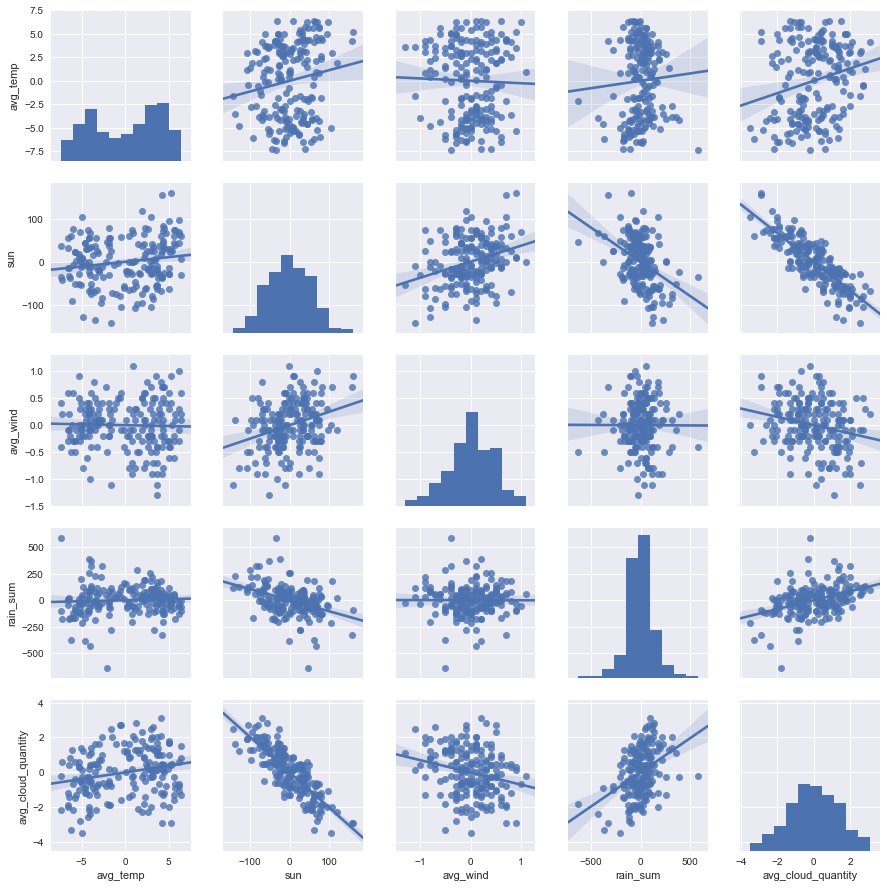

In [396]:
sns.pairplot(diff_data,kind='reg')

In [397]:
correlation_matrix = np.corrcoef(diff_data.transpose())

In [398]:
names = ['avg_temp','sun','avg_wind','rain_sum','cloud_quantity']

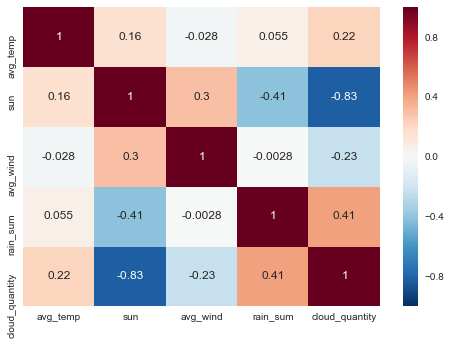

In [399]:
sns.heatmap(correlation_matrix, annot=True, xticklabels=names,yticklabels=names)

# Cloud quantityは日差しとか、気温とかとあまりにも相関するからバイバイする

In [400]:
w_data = w_data.drop(['avg_cloud_quantity'],axis=1)
diff_data = diff_data.drop(['avg_cloud_quantity'],axis=1)

# 横浜市のデータを読み込む！

# うまく書けなかった。。
num=2000
df = pd.DataFrame()

for i in range (15):
    df = df.append(pd.read_excel('yoko_econ.xlsx',sheetname=2016))
    num += 1

In [403]:
dat2000 = pd.read_excel('yoko_econ.xlsx',sheetname='2000').T.drop(['平均'],axis=0).reset_index()
dat2001 = pd.read_excel('yoko_econ.xlsx',sheetname='2001').T.drop(['平均'],axis=0).reset_index()
dat2002 = pd.read_excel('yoko_econ.xlsx',sheetname='2002').T.drop(['平均'],axis=0).reset_index()
dat2003 = pd.read_excel('yoko_econ.xlsx',sheetname='2003').T.drop(['平均'],axis=0).reset_index()
dat2004 = pd.read_excel('yoko_econ.xlsx',sheetname='2004').T.drop(['平均'],axis=0).reset_index()
dat2005 = pd.read_excel('yoko_econ.xlsx',sheetname='2005').T.drop(['平均'],axis=0).reset_index()
dat2006 = pd.read_excel('yoko_econ.xlsx',sheetname='2006').T.drop(['平均'],axis=0).reset_index()
dat2007 = pd.read_excel('yoko_econ.xlsx',sheetname='2007').T.drop(['平均'],axis=0).reset_index()
dat2008 = pd.read_excel('yoko_econ.xlsx',sheetname='2008').T.drop(['平均'],axis=0).reset_index()
dat2009 = pd.read_excel('yoko_econ.xlsx',sheetname='2009').T.drop(['平均'],axis=0).reset_index()
dat2010 = pd.read_excel('yoko_econ.xlsx',sheetname='2010').T.drop(['平均'],axis=0).reset_index()
dat2011 = pd.read_excel('yoko_econ.xlsx',sheetname='2011').T.drop(['平均'],axis=0).reset_index()
dat2012 = pd.read_excel('yoko_econ.xlsx',sheetname='2012').T.drop(['平均'],axis=0).reset_index()
dat2013 = pd.read_excel('yoko_econ.xlsx',sheetname='2013').T.drop(['平均'],axis=0).reset_index()
dat2014 = pd.read_excel('yoko_econ.xlsx',sheetname='2014').T.drop(['平均'],axis=0).reset_index()
dat2015 = pd.read_excel('yoko_econ.xlsx',sheetname='2015').T.drop(['平均'],axis=0).reset_index()
#dat2016 = pd.read_excel('yoko_econ.xlsx',sheetname='2016').T.drop(['平均'],axis=0).reset_index()
#dat2016は平均値をもたないよ（）

In [196]:
#縦型のデータに突合する
dat = pd.concat([dat2000,dat2001,dat2002,dat2003,dat2004,dat2005,dat2006,dat2007,dat2008,dat2009,dat2010,dat2011,dat2012,dat2013,dat2014,dat2015],axis=0)

In [197]:
tar_data = dat.set_index('index').loc[:,['消費支出','食料','住居','光熱・水道','家具・家事用品','被服及び履物','保健医療','交通・通信','教育','教養娯楽','その他の消費支出']]

In [198]:
##各移動平均と差分系列を取得
#消費
consumption_data = tar_data.loc[:,['消費支出']]
consumption_moving_avg = consumption_data.rolling(window=12).mean().dropna()
consumption_diff = consumption_data.diff().dropna().dropna()
#食料
food_data = tar_data.loc[:,['食料']]
food_moving_avg = food_data.rolling(window=12).mean().dropna()
food_diff = food_data.diff().dropna()
#住居
estate_data = tar_data.loc[:,['住居']]
estate_moving_avg = estate_data.rolling(window=12).mean().dropna()
estate_diff = estate_data.diff().dropna()
#光熱、水道
utility_data = tar_data.loc[:,['光熱・水道']]
utility_moving_avg = utility_data.rolling(window=12).mean().dropna()
utility_diff = utility_data.diff().dropna()
#家具・家事用品
furniture_data = tar_data.loc[:,['家具・家事用品']]
furniture_moving_avg = furniture_data.rolling(window=12).mean().dropna()
furniture_diff = furniture_data.diff().dropna()
#被服及び履物
cloth_data = tar_data.loc[:,['被服及び履物']]
cloth_moving_avg = cloth_data.rolling(window=12).mean().dropna()
cloth_diff = cloth_data.diff().dropna()
#保健医療
medical_data = tar_data.loc[:,['保健医療']]
medical_moving_avg = medical_data.rolling(window=12).mean().dropna()
medical_diff = medical_data.diff().dropna()
#風量
com_data = tar_data.loc[:,['交通・通信']]
com_moving_avg = com_data.rolling(window=12).mean().dropna()
com_diff = com_data.diff().dropna()
#教育
edu_data = tar_data.loc[:,['教育']]
edu_moving_avg = edu_data.rolling(window=12).mean().dropna()
edu_diff = edu_data.diff().dropna()
#雲量
edu_fun_data = tar_data.loc[:,['教養娯楽']]
edu_fun_moving_avg = edu_fun_data.rolling(window=12).mean().dropna()
edu_fun_diff = edu_fun_data.diff().dropna()

In [199]:
#原系列に対するADF検定
print (st.adfuller(tar_data['消費支出'].values.ravel()))
print (st.adfuller(tar_data['食料'].values.ravel()))
print (st.adfuller(tar_data['住居'].values.ravel()))
print (st.adfuller(tar_data['光熱・水道'].values.ravel()))
print (st.adfuller(tar_data['家具・家事用品'].values.ravel()))
print (st.adfuller(tar_data['被服及び履物'].values.ravel()))
print (st.adfuller(tar_data['保健医療'].values.ravel()))
print (st.adfuller(tar_data['交通・通信'].values.ravel()))
print (st.adfuller(tar_data['教育'].values.ravel()))
print (st.adfuller(tar_data['教養娯楽'].values.ravel()))

(-1.8142038948570183, 0.37343300380958933, 11, 180, {'1%': -3.4672111510631001, '5%': -2.8777347668038411, '10%': -2.5754033641975309}, 4069.5035305453284)
(-2.8598647489026443, 0.050218207064792124, 13, 178, {'1%': -3.4676315191519058, '5%': -2.8779183721695567, '10%': -2.5755013533644742}, 3074.4091909200088)
(-5.7864261107432613, 4.987099498973615e-07, 2, 189, {'1%': -3.4654311561944873, '5%': -2.8769570530458792, '10%': -2.574988319755886}, 3669.2759700093111)
(-4.0662669702101875, 0.0011006248966932929, 13, 178, {'1%': -3.4676315191519058, '5%': -2.8779183721695567, '10%': -2.5755013533644742}, 3083.2184115307628)
(-5.0244540157950981, 1.9848431484155809e-05, 9, 374, {'1%': -3.4479562840494475, '5%': -2.8692991099175238, '10%': -2.5709034510566502}, 6703.1864183516573)
(-3.5451502867737474, 0.0069004876884023693, 11, 372, {'1%': -3.4480516066132636, '5%': -2.8693409974737589, '10%': -2.5709257824603999}, 6778.3413657591027)
(-11.278548168300956, 1.4756880765410396e-20, 0, 191, {'1

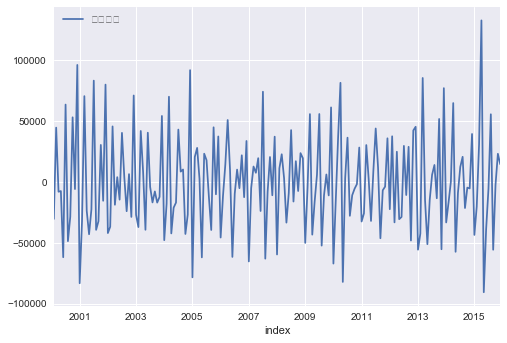

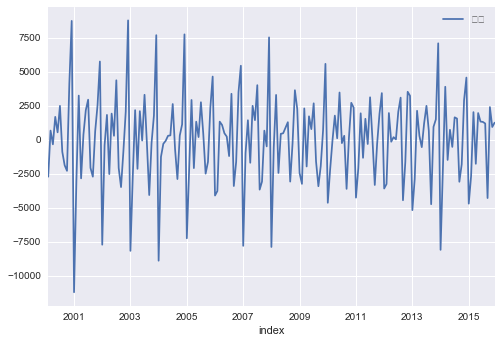

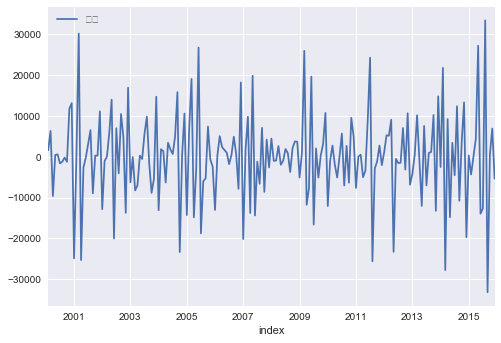

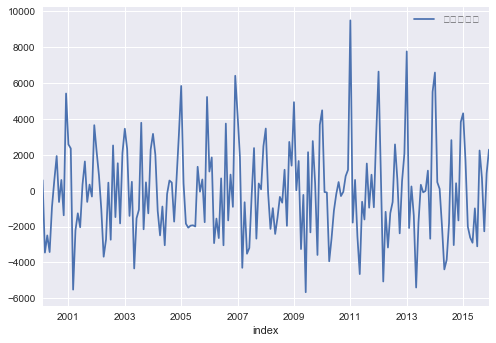

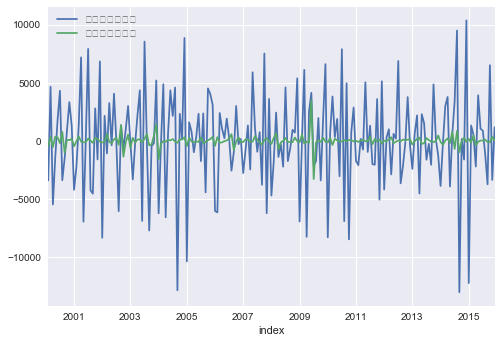

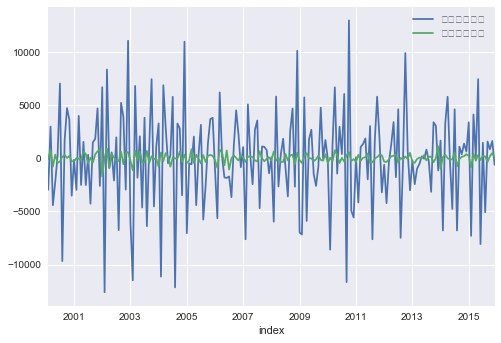

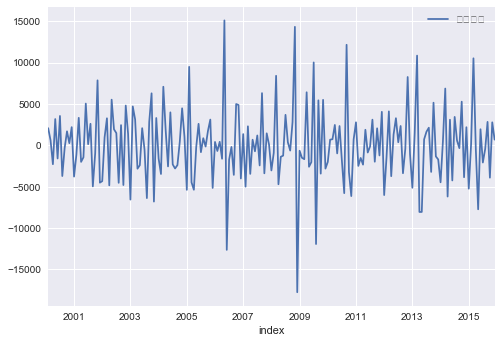

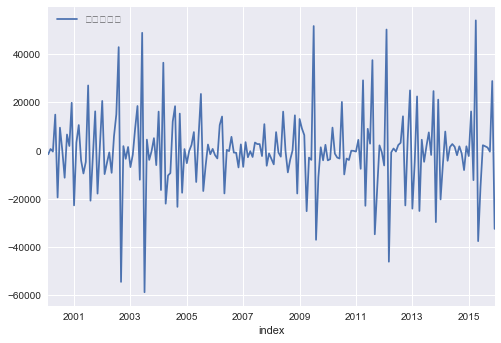

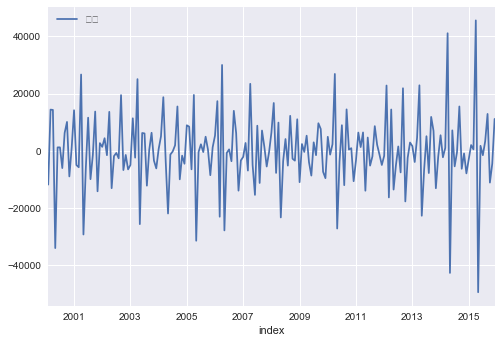

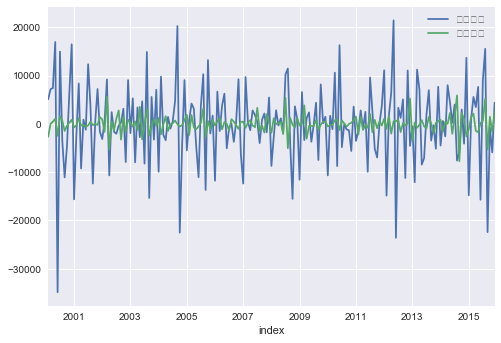

In [200]:
#差分
consumption_diff.plot()
food_diff.plot()
estate_diff.plot()
utility_diff.plot()
furniture_diff.plot()
cloth_diff.plot()
medical_diff.plot()
com_diff.plot()
edu_diff.plot()
edu_fun_diff.plot()

In [330]:
diff_data_2 = pd.concat([consumption_diff,food_diff,estate_diff,utility_diff,furniture_diff,cloth_diff,medical_diff,com_diff,edu_diff,edu_fun_diff],axis=1)

In [331]:
diff_data_2.head()

,消費支出,食料,住居,光熱・水道,家具・家事用品,家具・家事用品,被服及び履物,被服及び履物,保健医療,交通・通信,教育,教養娯楽,教養娯楽
index,,,,,,,,,,,,,
2000-02-01,-30346.0,-2729.0,1607.0,587.0,-3420.0,-462.0,-2966.0,-95.0,2065.0,-1491.0,-11775.0,5098.0,-2673.0
2000-03-01,44758.0,661.0,6306.0,-3450.0,4643.0,344.0,2971.0,824.0,602.0,684.0,14378.0,7188.0,20.0
2000-04-01,-7959.0,-351.0,-9626.0,-2491.0,-5487.0,-547.0,-4422.0,-794.0,-2289.0,-383.0,14276.0,7414.0,474.0
2000-05-01,-7416.0,1671.0,425.0,-3421.0,-1445.0,345.0,-2217.0,341.0,3173.0,14933.0,-33940.0,16949.0,1061.0
2000-06-01,-61825.0,531.0,575.0,-909.0,1802.0,292.0,261.0,-445.0,-1596.0,-19398.0,1196.0,-34867.0,-2465.0


In [332]:
diff_data_2.columns = [
    'total_consumption'
    ,'food'
    ,'estate'
    ,'utility'
    ,'furniture'
    ,'furniture_2'
    ,'cloth'
    ,'cloth_2'
    ,'medical'
    ,'telecom'
    ,'education'
    ,'edu_fun'
    ,'edu_fun_2'
]

In [356]:
x_train = diff_data
y_train = diff_data_2

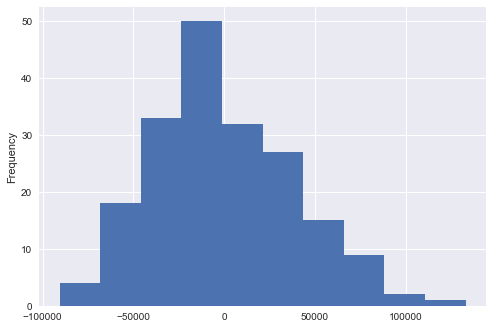

In [357]:
y_train['total_consumption'].plot(kind='hist')

In [358]:
x_train = x_train.reset_index().loc[:,['avg_temp','sun','avg_wind','rain_sum']]
con_train = y_train.loc[:,['total_consumption']].reset_index().drop(['index'],axis=1)

In [359]:
x_train.head()

,avg_temp,sun,avg_wind,rain_sum
0,-1.7,54.9,0.2,-73.5
1,3.4,3.8,0.5,111.0
2,5.0,-29.0,-0.3,3.5
3,5.1,23.4,-0.4,-43.0
4,2.3,-64.5,0.0,192.5


In [360]:
#random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(x_train, sum_comp)
print('Training done using Random Forest')

Training done using Random Forest


/Users/Taishi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


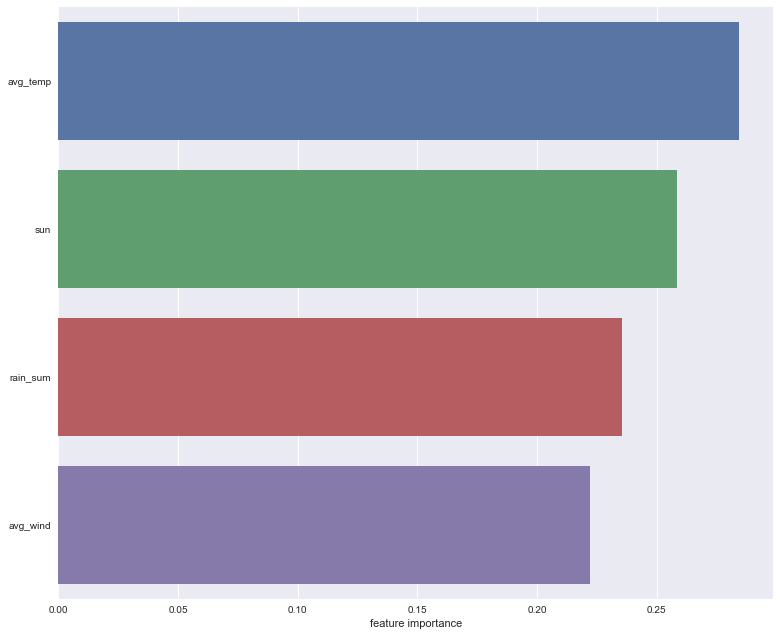

In [361]:
#plot
ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x=rf.feature_importances_[ranking], y=x_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

# 気温がもっとも効果ありそう
# ARIMAモデルで推定じゃ！

In [329]:
x_train.head()

,avg_temp,sun,avg_wind,rain_sum
0,-1.7,54.9,0.2,-73.5
1,3.4,3.8,0.5,111.0
2,5.0,-29.0,-0.3,3.5
3,5.1,23.4,-0.4,-43.0
4,2.3,-64.5,0.0,192.5


In [417]:
#自己相関
ts_acf = st.acf(diff_data.values.ravel(),nlags=40)
ts_acf_2 = st.acf(diff_data_2.values.ravel(),nlags=40)
print (ts_acf)
print (ts_acf_2)

[  1.00000000e+00   5.55892917e-03  -8.32102976e-02   6.11274624e-04
  -4.59802073e-01  -1.05230037e-03   4.06529493e-02   4.43951306e-03
   1.65514342e-03  -1.02405820e-03   8.99538040e-02   4.00168973e-03
  -6.24973477e-02  -3.40194199e-03  -4.46222479e-02   3.14585326e-04
   3.28438848e-02  -2.39758820e-03  -2.13861978e-02  -1.60590361e-03
   4.17980098e-03  -1.89993029e-03  -2.00809951e-02  -3.37808898e-03
  -3.49552373e-02  -3.10591237e-03   9.71642872e-02  -4.84296795e-04
   6.62748771e-03  -1.61839876e-03  -5.71508484e-02  -3.91081759e-03
   1.89579582e-02   9.09376522e-04  -3.77995097e-02  -2.36888819e-03
  -3.23817621e-02   3.60549143e-03   6.75837403e-02  -1.59401058e-03
  -6.93308746e-02]
[  1.00000000e+00   5.11648021e-02   5.00280161e-02  -4.25796855e-02
  -3.59455366e-02   1.10799583e-02   1.73537204e-02  -1.04272732e-02
   1.59076613e-02   1.45918192e-01   7.29413621e-02   5.22128960e-02
  -1.80710743e-02  -3.98051685e-01  -1.68587182e-02  -6.11494228e-02
  -9.45803427e-

In [418]:
#偏自己相関
par_ts_acf = st.pacf(diff_data.values.ravel(),nlags=40)
par_ts_acf_2 = st.pacf(diff_data.values.ravel(),nlags=40)
print (par_ts_acf)
print (par_ts_acf_2)

[ 1.          0.00556618 -0.08346113  0.0015925  -0.47249282  0.00676601
 -0.07170465  0.01022123 -0.28740388  0.00987199  0.05493091  0.01652745
 -0.24009965  0.0074976   0.01776238  0.02066515 -0.17662657  0.00199199
 -0.0225137   0.02178107 -0.14764788 -0.00265913 -0.06355782  0.02021645
 -0.1860135  -0.00352899  0.04726692  0.0150631  -0.1384543  -0.01410569
  0.02330409  0.00557432 -0.10243465 -0.02382571 -0.04385311 -0.00160518
 -0.18636605 -0.01861929  0.0179214  -0.00729378 -0.3140528 ]
[ 1.          0.00556618 -0.08346113  0.0015925  -0.47249282  0.00676601
 -0.07170465  0.01022123 -0.28740388  0.00987199  0.05493091  0.01652745
 -0.24009965  0.0074976   0.01776238  0.02066515 -0.17662657  0.00199199
 -0.0225137   0.02178107 -0.14764788 -0.00265913 -0.06355782  0.02021645
 -0.1860135  -0.00352899  0.04726692  0.0150631  -0.1384543  -0.01410569
  0.02330409  0.00557432 -0.10243465 -0.02382571 -0.04385311 -0.00160518
 -0.18636605 -0.01861929  0.0179214  -0.00729378 -0.3140528 ]


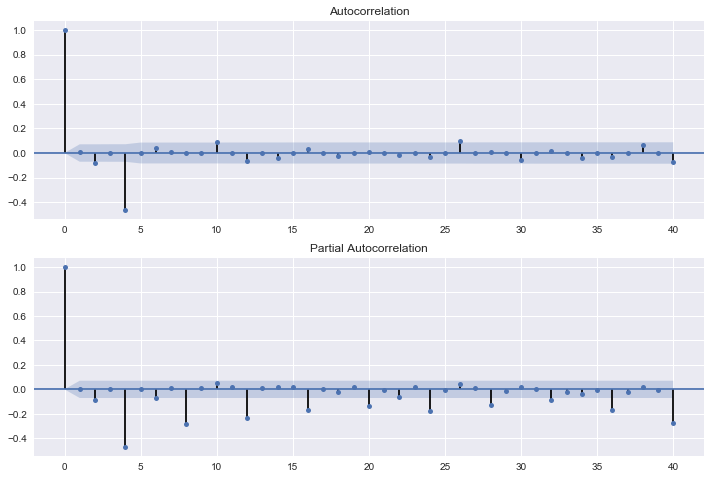

In [415]:
# 自己相関のグラフ
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff_data.values.ravel(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff_data.values.ravel(), lags=40, ax=ax2)

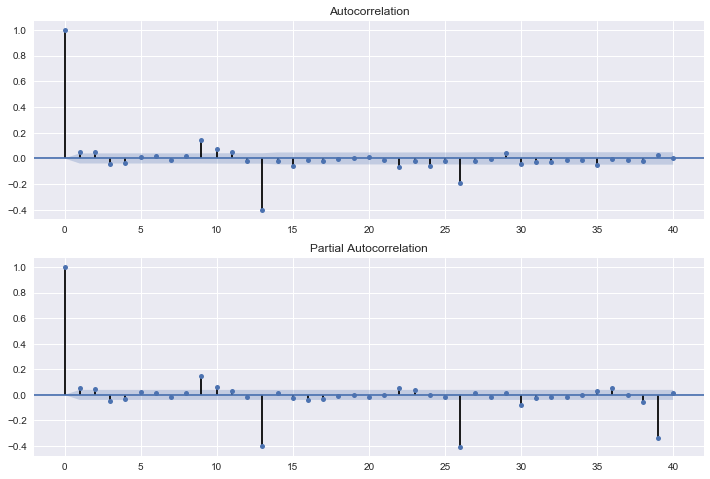

In [419]:
# 自己相関のグラフ
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff_data_2.values.ravel(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff_data_2.values.ravel(), lags=40, ax=ax2)

In [409]:

# 差分系列への自動ARMA推定関数の実行
resDiff = sm.tsa.arma_order_select_ic(diff_data_2, ic='aic', trend='nc')

IndexError: index 0 is out of bounds for axis 0 with size 0

In [408]:
results=ARIMA(diff_data,order = [1,0,0]).fit()

ValueError: could not broadcast input array from shape (4) into shape (1)